In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Manhattan Map

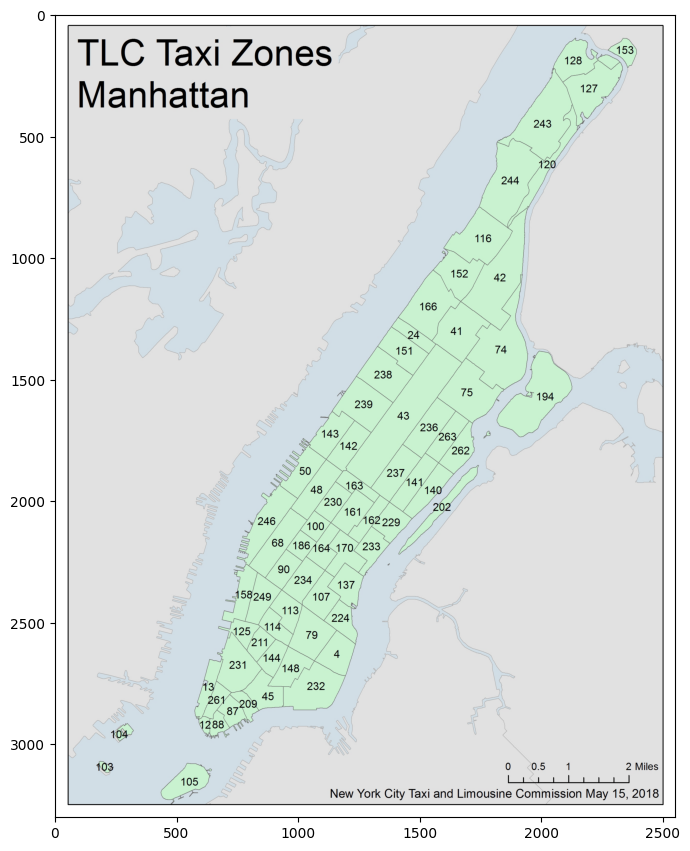

In [16]:
manhattan = plt.imread("./taxi_zone_map_manhattan.jpg")
plt.figure(figsize=(8,14))
plt.imshow(manhattan) 
plt.show()

In [2]:
df = pd.read_parquet("./yellow_tripdata_2022-01.parquet", engine= "auto")

## Utility Functions

In [70]:
def open_sample_from_file(path : str,column_to_search: str = None , search_value:str|float|int = None, show_columns = False) -> pd.DataFrame | pd.Series :
    """
    Helper function to read a file sample with optional search conditions
    """
    parquet = path.endswith('parquet')
    func = getattr(pd, f'read_csv')
    if parquet:
        engine = 'auto'
        func = getattr(pd, f'read_parquet')
        return func(path, engine)
    
    if column_to_search:
        if search_value != None:
            df = func(path)
            return df[df[column_to_search] == search_value]
        
        return func(path)[column_to_search] 

    if show_columns:
        return func(path).columns

    return func(path)


In [79]:
manhattan_df = open_sample_from_file("./taxi+_zone_lookup.csv",column_to_search='Borough',search_value='Manhattan')

In [98]:
manhattan_ids = manhattan_df[manhattan_df['service_zone']=='Yellow Zone'].LocationID.values

In [99]:
manhattan_ids

array([  4,  12,  13,  24,  43,  45,  48,  50,  68,  79,  87,  88,  90,
       100, 103, 104, 105, 107, 113, 114, 125, 137, 140, 141, 142, 143,
       144, 148, 151, 158, 161, 162, 163, 164, 170, 186, 194, 209, 211,
       224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 246, 249,
       261, 262, 263], dtype=int64)

In [100]:
df[df["PULocationID"].isin(manhattan_ids)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.00,0.5,0.5,5.20,0.0,0.3,26.00,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN
